In [1]:
# Importing core libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# For creating 3D plots
from mpl_toolkits.mplot3d import Axes3D

# Importing modules from scikit-learn for model building and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [2]:
sns.set(style='whitegrid')

In [3]:
# Create a dictionary to hold both datasets for easy looping
wine_dfs = {
    "Red Wine": pd.read_csv("../datasets/red-wine-quality.csv", sep=";"),
    "White Wine": pd.read_csv("../datasets/white-wine-quality.csv", sep=";")
}

# Display the first few rows of each dataset using a loop
for wine_type, df in wine_dfs.items():
    print(f"--- {wine_type} ---")
    print(df.head(), "\n")



--- Red Wine ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2  

In [4]:
# Loop through each dataframe and print its info and statistical summary
for wine_type, df in wine_dfs.items():
    print(f"=== {wine_type} Dataset Information ===")
    df.info()
    print(f"\n=== {wine_type} Statistical Summary ===")
    print(df.describe(), "\n")


=== Red Wine Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

=== Red Wine Statistical Summary ===
       fixed acidity  volatile acidity  citric acid

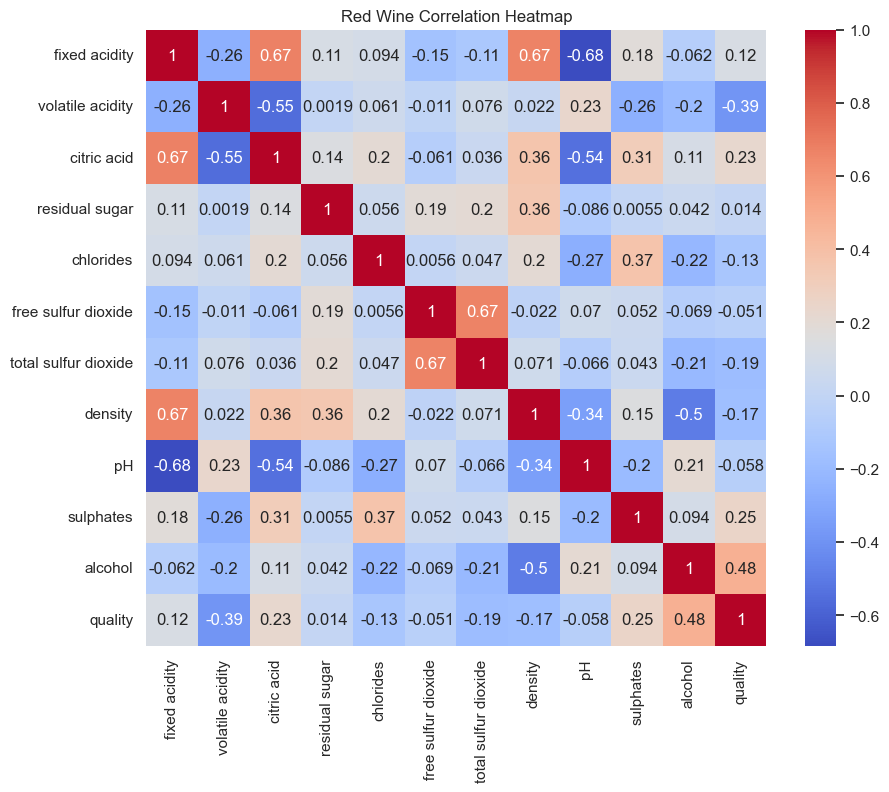

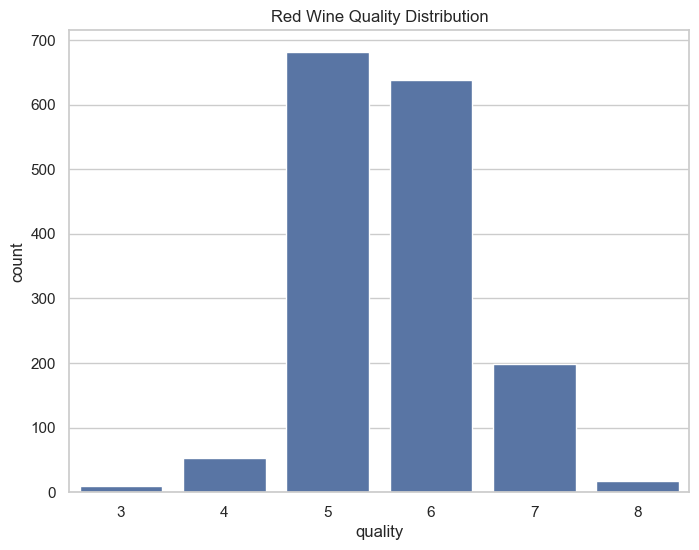

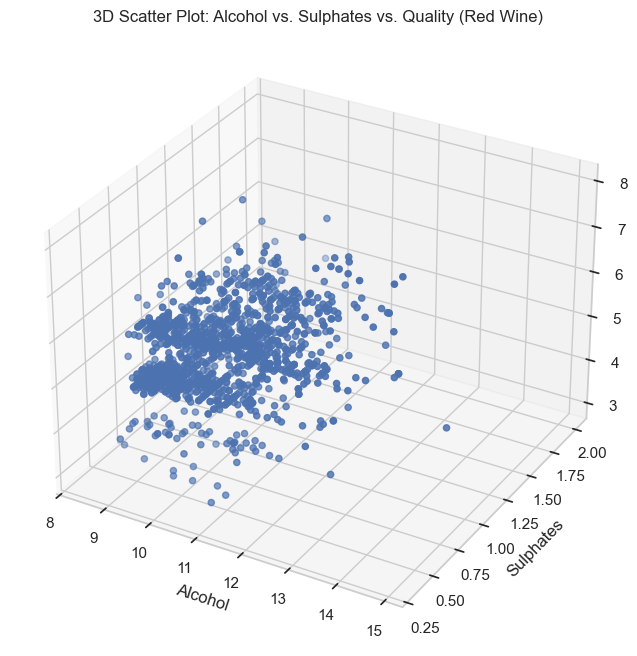

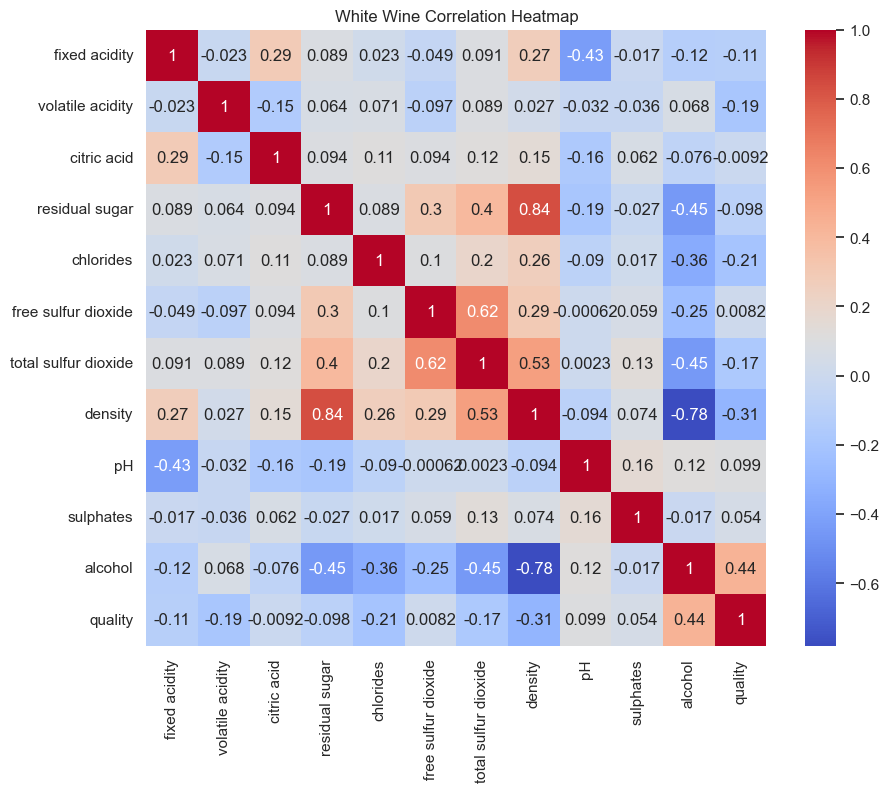

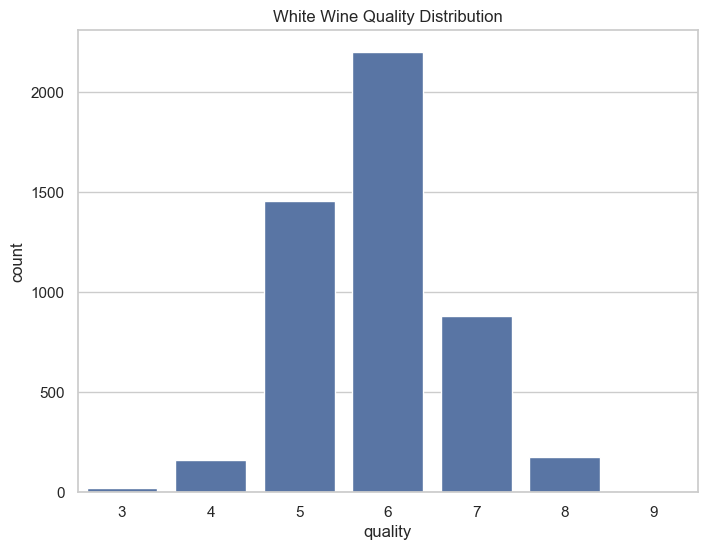

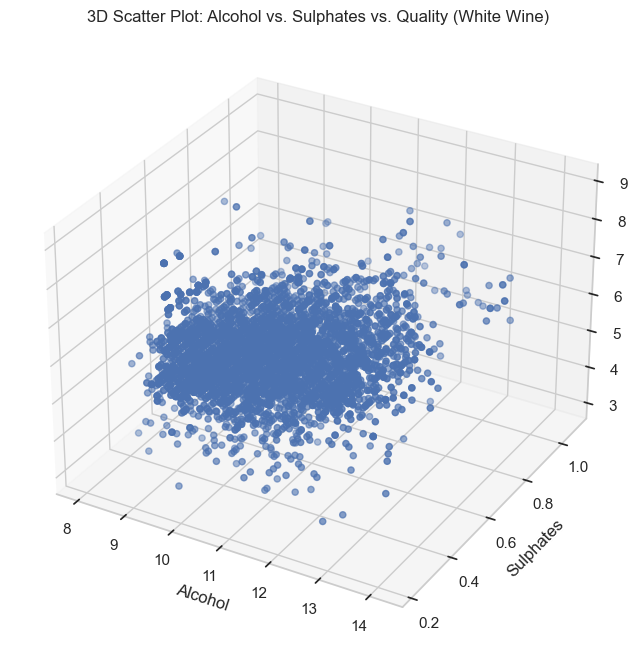

In [5]:
# Loop over each wine dataframe for visualizations
for wine_type, df in wine_dfs.items():
    # Set up a figure for correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
    plt.title(f"{wine_type} Correlation Heatmap")
    plt.show()
    
    # Countplot for quality distribution
    plt.figure(figsize=(8, 6))
    sns.countplot(x="quality", data=df)
    plt.title(f"{wine_type} Quality Distribution")
    plt.show()
    
    # 3D Scatter Plot: Alcohol vs. Sulphates vs. Quality
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['alcohol'], df['sulphates'], df['quality'], marker='o')
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Sulphates')
    ax.set_zlabel('Quality')
    plt.title(f"3D Scatter Plot: Alcohol vs. Sulphates vs. Quality ({wine_type})")
    plt.show()


In [6]:
# from sklearn.model_selection import train_test_split

# Create a dictionary to store train and test splits for each dataset
data_splits = {}

# Loop through each wine dataframe and perform train-test split
for wine_type, df in wine_dfs.items():
    # Separate features and target variable
    X = df.drop("quality", axis=1)
    y = df["quality"]
    
    # Split data (80% training, 20% testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Save the splits in the dictionary
    data_splits[wine_type] = {
        "X_train": X_train,
        "X_test": X_test,
        "y_train": y_train,
        "y_test": y_test
    }
    
    # Print the shapes of the splits for confirmation
    print(f"{wine_type}:")
    print(f"  X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
    print(f"  y_train shape: {y_train.shape}, y_test shape: {y_test.shape}\n")


Red Wine:
  X_train shape: (1279, 11), X_test shape: (320, 11)
  y_train shape: (1279,), y_test shape: (320,)

White Wine:
  X_train shape: (3918, 11), X_test shape: (980, 11)
  y_train shape: (3918,), y_test shape: (980,)



In [7]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVR

# Define the SVR kernels to test
svr_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Dictionary to store the trained SVR models for each wine dataset
svr_trained_models = {}

# Loop over each wine dataset split
for wine_type, splits in data_splits.items():
    print(f"Training SVR models for {wine_type} dataset...")
    X_train, y_train = splits['X_train'], splits['y_train']
    
    # Create a dictionary of pipelines for each kernel
    pipelines = {kernel: Pipeline([
        ('scaler', StandardScaler()),  # Scaling the features
        ('svr', SVR(kernel=kernel))       # SVR model with the specified kernel
    ]) for kernel in svr_kernels}
    
    # Train each SVR pipeline and store in a dictionary
    trained_models = {}
    for kernel, pipe in pipelines.items():
        print(f"Training SVR with {kernel} kernel...")
        pipe.fit(X_train, y_train)
        trained_models[kernel] = pipe
    
    svr_trained_models[wine_type] = trained_models
    print(f"All SVR models trained successfully for {wine_type}!\n")

# Display the dictionary of trained models for inspection
svr_trained_models


Training SVR models for Red Wine dataset...
Training SVR with linear kernel...
Training SVR with poly kernel...
Training SVR with rbf kernel...
Training SVR with sigmoid kernel...
All SVR models trained successfully for Red Wine!

Training SVR models for White Wine dataset...
Training SVR with linear kernel...
Training SVR with poly kernel...
Training SVR with rbf kernel...
Training SVR with sigmoid kernel...
All SVR models trained successfully for White Wine!



{'Red Wine': {'linear': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='linear'))]),
  'poly': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='poly'))]),
  'rbf': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())]),
  'sigmoid': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='sigmoid'))])},
 'White Wine': {'linear': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='linear'))]),
  'poly': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='poly'))]),
  'rbf': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR())]),
  'sigmoid': Pipeline(steps=[('scaler', StandardScaler()), ('svr', SVR(kernel='sigmoid'))])}}


=================== Evaluation for Red Wine ===================

ℹ️  Evaluation for linear kernel:
✅ Accuracy: 0.75
✅ Precision: 0.80
✅ Recall: 0.75
✅ F1 Score: 0.77

✅ Confusion Matrix:
[[107  34]
 [ 45 134]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73       141
           1       0.80      0.75      0.77       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.76      0.75      0.75       320



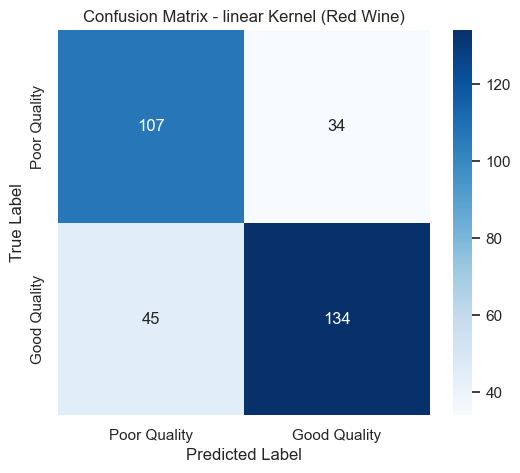


ℹ️  Evaluation for poly kernel:
✅ Accuracy: 0.75
✅ Precision: 0.77
✅ Recall: 0.80
✅ F1 Score: 0.78

✅ Confusion Matrix:
[[ 97  44]
 [ 35 144]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       141
           1       0.77      0.80      0.78       179

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



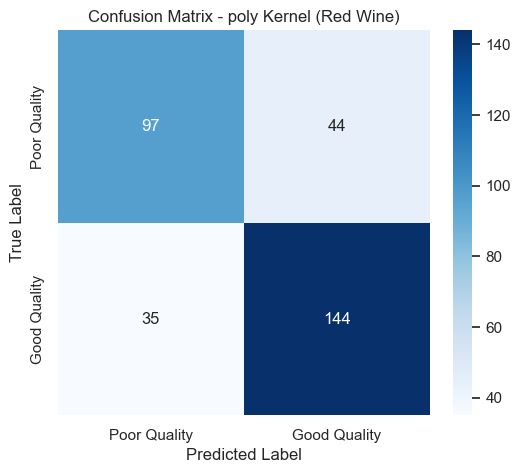


ℹ️  Evaluation for rbf kernel:
✅ Accuracy: 0.76
✅ Precision: 0.81
✅ Recall: 0.75
✅ F1 Score: 0.78

✅ Confusion Matrix:
[[109  32]
 [ 45 134]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       141
           1       0.81      0.75      0.78       179

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320



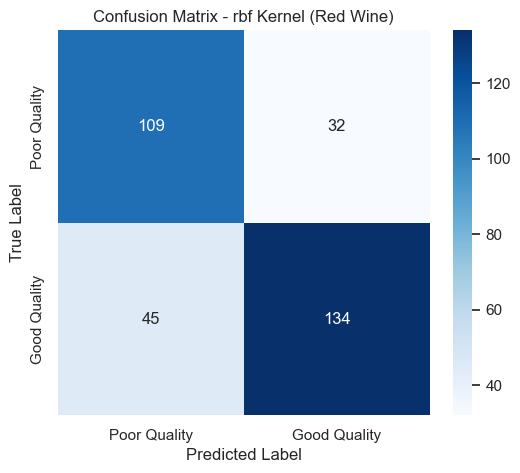


ℹ️  Evaluation for sigmoid kernel:
✅ Accuracy: 0.48
✅ Precision: 0.54
✅ Recall: 0.52
✅ F1 Score: 0.53

✅ Confusion Matrix:
[[61 80]
 [86 93]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.43      0.42       141
           1       0.54      0.52      0.53       179

    accuracy                           0.48       320
   macro avg       0.48      0.48      0.48       320
weighted avg       0.48      0.48      0.48       320



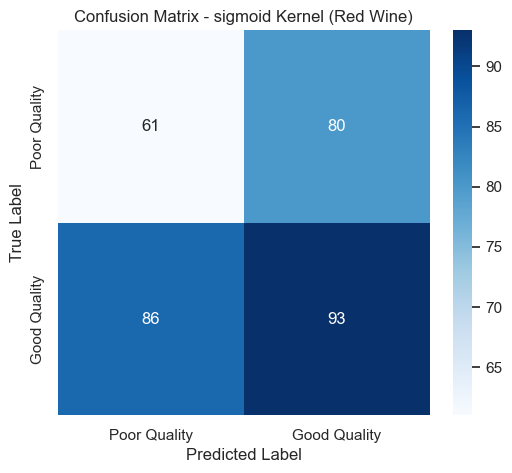


=================== Evaluation for White Wine ===================

ℹ️  Evaluation for linear kernel:
✅ Accuracy: 0.73
✅ Precision: 0.77
✅ Recall: 0.85
✅ F1 Score: 0.81

✅ Confusion Matrix:
[[156 165]
 [ 96 563]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.54       321
           1       0.77      0.85      0.81       659

    accuracy                           0.73       980
   macro avg       0.70      0.67      0.68       980
weighted avg       0.72      0.73      0.72       980



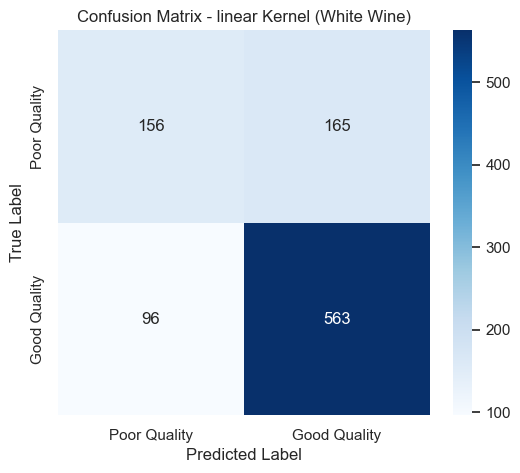


ℹ️  Evaluation for poly kernel:
✅ Accuracy: 0.73
✅ Precision: 0.74
✅ Recall: 0.93
✅ F1 Score: 0.82

✅ Confusion Matrix:
[[100 221]
 [ 46 613]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.31      0.43       321
           1       0.74      0.93      0.82       659

    accuracy                           0.73       980
   macro avg       0.71      0.62      0.62       980
weighted avg       0.72      0.73      0.69       980



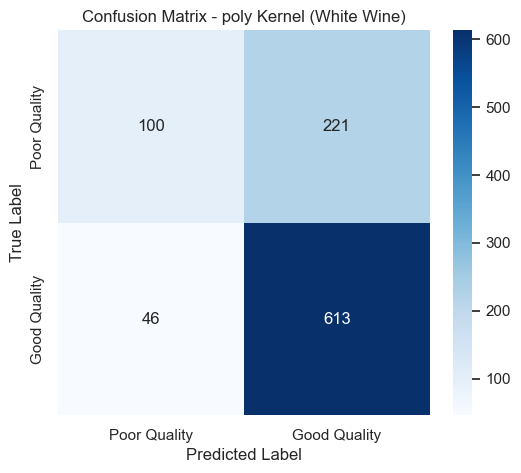


ℹ️  Evaluation for rbf kernel:
✅ Accuracy: 0.78
✅ Precision: 0.82
✅ Recall: 0.86
✅ F1 Score: 0.84

✅ Confusion Matrix:
[[196 125]
 [ 89 570]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       321
           1       0.82      0.86      0.84       659

    accuracy                           0.78       980
   macro avg       0.75      0.74      0.74       980
weighted avg       0.78      0.78      0.78       980



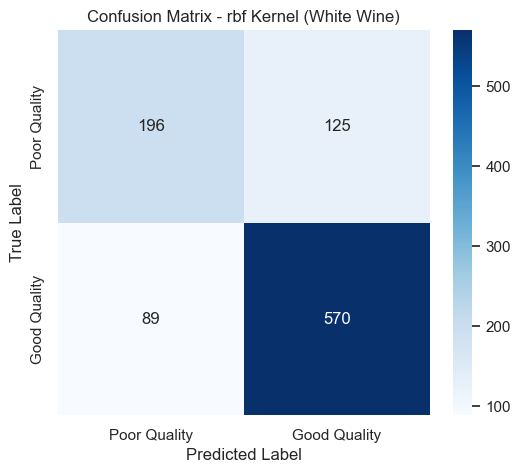


ℹ️  Evaluation for sigmoid kernel:
✅ Accuracy: 0.51
✅ Precision: 0.68
✅ Recall: 0.52
✅ F1 Score: 0.59

✅ Confusion Matrix:
[[158 163]
 [315 344]]

✅ Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.49      0.40       321
           1       0.68      0.52      0.59       659

    accuracy                           0.51       980
   macro avg       0.51      0.51      0.49       980
weighted avg       0.57      0.51      0.53       980



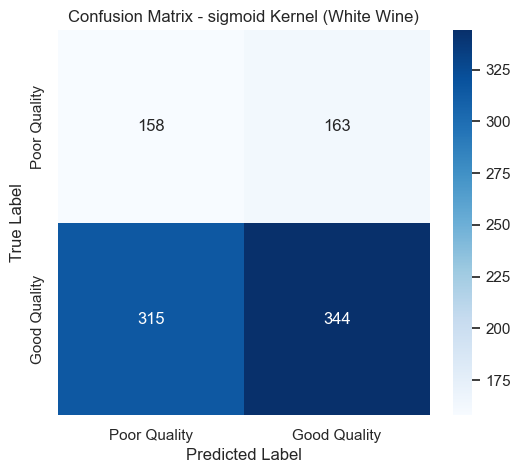

In [8]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate each trained SVR model for each wine dataset
for wine_type, models in svr_trained_models.items():
    print(f"\n=================== Evaluation for {wine_type} ===================")
    X_test = data_splits[wine_type]["X_test"]
    y_test = data_splits[wine_type]["y_test"]
    
    # Create binary classification labels based on a threshold:
    # Consider quality >= 6 as "Good Quality" (1) and <6 as "Poor Quality" (0)
    y_test_class = (y_test >= 6).astype(int)
    
    for kernel, model in models.items():
        print(f"\nℹ️  Evaluation for {kernel} kernel:")
        
        # Predict on test set (SVR returns continuous values)
        y_pred_reg = model.predict(X_test)
        # Convert regression predictions to binary labels (using rounding and thresholding)
        y_pred_class = (np.round(y_pred_reg) >= 6).astype(int)
        
        # Compute Metrics
        accuracy = accuracy_score(y_test_class, y_pred_class)
        precision = precision_score(y_test_class, y_pred_class, zero_division=0)
        recall = recall_score(y_test_class, y_pred_class, zero_division=0)
        f1 = f1_score(y_test_class, y_pred_class, zero_division=0)
        conf_matrix = confusion_matrix(y_test_class, y_pred_class)
        class_report = classification_report(y_test_class, y_pred_class, zero_division=0)
        
        # Print Results
        print(f"✅ Accuracy: {accuracy:.2f}")
        print(f"✅ Precision: {precision:.2f}")
        print(f"✅ Recall: {recall:.2f}")
        print(f"✅ F1 Score: {f1:.2f}")
        
        print("\n✅ Confusion Matrix:")
        print(conf_matrix)
        
        print("\n✅ Classification Report:")
        print(class_report)
    
        # Plot Confusion Matrix
        plt.figure(figsize=(6, 5))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Poor Quality", "Good Quality"],
                    yticklabels=["Poor Quality", "Good Quality"])
        plt.xlabel("Predicted Label")
        plt.ylabel("True Label")
        plt.title(f"Confusion Matrix - {kernel} Kernel ({wine_type})")
        plt.show()
